<a href="https://colab.research.google.com/github/Mariana-zy/SyS-2025-2S/blob/main/Taller2/Punto_1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Punto 1.5**

**Ejercicio 1:** Consulte en qué consiste la modulación por amplitud por
detección coherente y sus aplicaciones.

# Modulación por Amplitud con Detección Coherente

## ¿En qué consiste?

La modulación por amplitud (AM) es una técnica en la que la amplitud de una onda portadora (una señal de alta frecuencia) varía en proporción a la amplitud de la señal mensaje (de baja frecuencia) que contiene la información.

La detección coherente, también llamada demodulación síncrona, es el proceso mediante el cual se recupera la señal mensaje original a partir de una señal AM recibida.
Para ello, el receptor utiliza una portadora de referencia local con la misma frecuencia y fase que la portadora original usada en la transmisión.
Esta portadora sincronizada se multiplica por la señal recibida, y posteriormente, un filtro pasa bajos elimina las componentes de alta frecuencia, dejando únicamente la señal mensaje original.

## Principio de funcionamiento

Para realizar la modulación se necesitan dos señales:

* **Portadora (carrier):** Es una señal de alta frecuencia (generalmente senoidal o cosenoidal), representada por:

  $ c(t) = A_c \sin(2\pi f_c t) $

   donde:
   - $ A_c $: Amplitud de la portadora  
   - $ f_c $: Frecuencia de la portadora

* **Señal mensaje (información):** Es la señal de baja frecuencia que se quiere transmitir. Puede ser senoidal o cualquier otra forma. Para ilustrar el proceso, se usa comúnmente una señal senoidal:

   $ m(t) = A_m \cos(2\pi f_m t) $

   donde:
   - $ A_m $: Amplitud de la señal mensaje  
   - $ f_m $: Frecuencia de la señal mensaje

**Índice de modulación:** El grado en que la señal portadora varía su amplitud se mide mediante el índice de modulación, definido como:

$$ I_m = \frac{Peak\{|m(t)|\}}{A_c} $$

   donde $ Peak\{|m(t)|\} $ es el valor máximo (pico) de la señal mensaje.  
   El índice de modulación debe cumplir $ 0 \le I_m \le 1 $ para evitar sobremodulación, que distorsiona la señal transmitida.

## Señal modulada en AM

La señal a transmitir, llamada señal modulada, se obtiene al multiplicar la portadora por un factor que depende de la señal mensaje:

$$ y(t) = \left( 1 + \frac{m(t)}{A_c} \right) c(t) $$

Sustituyendo $ c(t) = A_c \sin(2\pi f_c t): $

$$ y(t) = A_c \left[ 1 + \frac{A_m}{A_c} \cos(2\pi f_m t) \right] \sin(2\pi f_c t) $$

o, usando el índice de modulación $ I_m = \frac{A_m}{A_c}: $

$$ y(t) = A_c [ 1 + I_m \cos(2\pi f_m t) ] \sin(2\pi f_c t) $$

## Características principales

* La detección coherente requiere sincronización precisa entre la portadora transmitida y la generada localmente en el receptor (misma frecuencia y fase).  

* Permite recuperar la señal original con más precisión que la detección por envolvente (no coherente), porque en la detección coherente se conserva la fase y frecuencia exacta de la portadora. Esto evita distorsiones y hace que la señal recuperada sea más fiel al mensaje original.

## Aplicaciones de la Detección Coherente

* **Radio AM y sistemas analógicos:**  
  En receptores AM síncronos o balanceados, la detección coherente permite recuperar la voz o música con mayor calidad y menor distorsión gracias a una portadora local sincronizada.

* **Comunicaciones digitales modernas:**  
  Es fundamental en modulaciones como QAM, PSK y DSB-SC, donde la información se codifica en cambios de amplitud o fase.  
  Gracias a la sincronización entre transmisor y receptor, se logran transmisiones precisas y de alta velocidad, como en Wi-Fi, televisión digital, 4G y 5G.

* **Comunicaciones inalámbricas y telemetría:**  
  Se usa en sistemas donde transmisor y receptor pueden mantenerse sincronizados, como enlaces satelitales, drones y sensores remotos, permitiendo una transmisión más estable y con bajo error, incluso en presencia de ruido.

* **Procesamiento y análisis de señales:**  
  Se aplica para aislar o medir frecuencias específicas mediante la multiplicación por una portadora de referencia y filtrado.  
  Es útil en radares, control industrial, mediciones de vibraciones y bioseñales, donde se necesitan detectar señales débiles entre interferencias.









**Ejercicio 2:** Genere un ejemplo ilustrativo sobre Python en el que se grafique las señales en
el tiempo y en frecuencia (utilizando la rfft) para: señal mensaje tipo pulso rectangular y señal mensaje tipo coseno. El usuario podrá definir el índice de modulación de interés.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
Fc = 100          # frecuencia portadora
Fm = 10           # frecuencia del mensaje
Fs = 5*Fc         # frecuencia de muestreo
ti = 0
tf = 5/Fm
t = np.arange(ti, tf, 1/Fs)

# Mensajes
rect = np.zeros_like(t)
rect[(t >= tf*0.4) & (t < tf*0.6)] = 1  # pulso rectangular
cosm = np.cos(2*np.pi*Fm*t)    # mensaje coseno

# Definir índice de modulación
Im = float(input("Ingrese el índice de modulación (0 <= m <= 1): "))
Ac_rect = max(abs(rect))/Im
Ac_cosm = max(abs(cosm))/Im

# Portadoras
c = np.sin(2*np.pi*Fc*t)

# Señales moduladas
y_rect = (1 + rect/Ac_rect)*c
y_cosm = (1 + cosm/Ac_cosm)*c

# Transformadas usando rfft
def espectro(x):
    X = np.fft.rfft(x)
    freqs = np.fft.rfftfreq(len(x), 1/Fs)
    return freqs, np.abs(X)

f_rect, Y_rect = espectro(y_rect)
f_cosm, Y_cosm = espectro(y_cosm)
f_coso, M_cosm = espectro(cosm)
f_reco, M_rect = espectro(rect)



Ingrese el índice de modulación (0 <= m <= 1): 0.5


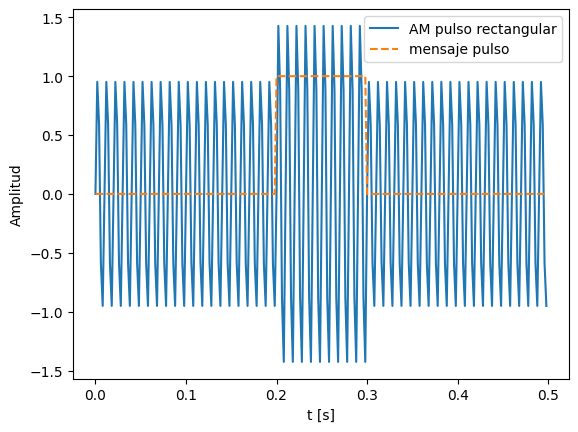

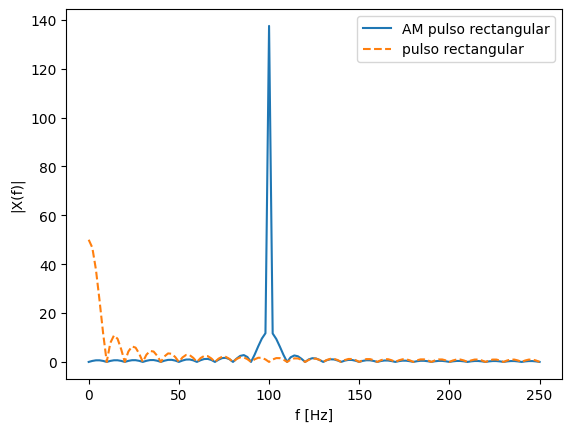

In [ ]:
# Pulso rectangular en tiempo
plt.figure()
plt.plot(t, y_rect, label='AM pulso rectangular')
plt.plot(t, rect, label='mensaje pulso', linestyle='--')
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.show()

# La portadora mantiene amplitud constante excepto durante el intervalo donde el pulso vale 1, donde la amplitud aumenta. El cambio de amplitud ocurre solo durante la duración del pulso

# Pulso rectangular en frecuencia
plt.figure()
plt.plot(f_rect, Y_rect, label='AM pulso rectangular')
plt.plot(f_reco, M_rect, label='pulso rectangular', linestyle='--')
plt.legend()
plt.xlabel('f [Hz]')
plt.ylabel('|X(f)|')
plt.show()

# La señal naranja muestra el espectro del pulso, concentrado en bajas frecuencias y con forma de lóbulos que se van reduciendo. Cuando se modula el pulso (línea azul), ese mismo espectro se “traslada” hacia la frecuencia de la portadora, generando un pico grande alrededor de 100 Hz y sus lóbulos alrededor

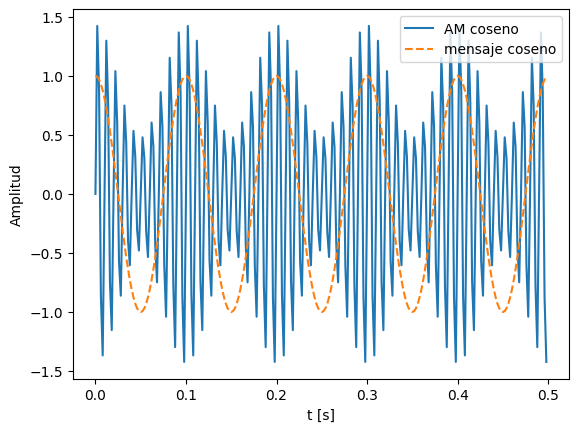

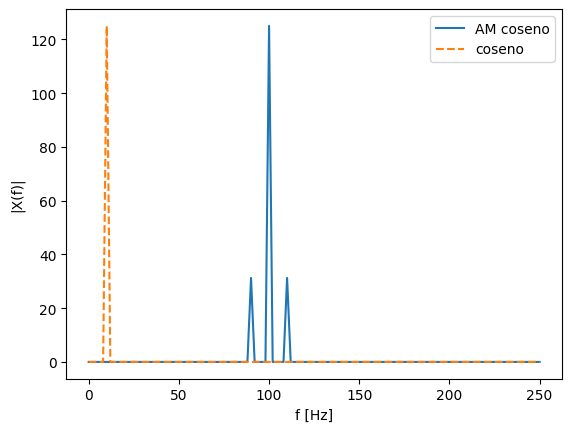

In [ ]:
# Coseno en tiempo
plt.figure()
plt.plot(t, y_cosm, label='AM coseno')
plt.plot(t, cosm, label='mensaje coseno', linestyle='--')
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.show()

# Se observa una onda de alta frecuencia (portadora) cuya envolvente es un coseno. La amplitud de la portadora varía suavemente siguiendo la forma del mensaje

# Coseno en frecuencia
plt.figure()
plt.plot(f_cosm, Y_cosm, label='AM coseno')
plt.plot(f_coso, M_cosm, label='coseno', linestyle='--')
plt.legend()
plt.xlabel('f [Hz]')
plt.ylabel('|X(f)|')
plt.show()

# Aparecen tres picos principales: uno en la frecuencia de la portadora y dos bandas laterales simétricas en Fc-Fm y Fc+Fm. Esto confirma la modulación AM con mensaje sinusoidal